In [1]:
import numpy as np
from matplotlib import pyplot as pl
%matplotlib inline

In [2]:
#set parameters
nx = 41
L = 2.0
dx = L / (nx - 1)

nu = 0.3

sigma = 0.6
dt = sigma * dx**2 / nu
nt = 20

In [3]:
x = np.linspace(0.0, L, num = nx)

In [4]:
u0 = np.ones(nx)
mask = np.where((0.5 <= x)&(x <= 1.0))
u0[mask] = 2.0

In [5]:
u = u0.copy()
for n in range(nt):
    un = u.copy()
    for i in range(1, nx - 1):
        u[i] = un[i] + sigma * (un[i - 1] - 2 * un[i] + un[i + 1])
#    u[0] = 1.0
#    u[-1] = 1.0

u_naive = u

In [6]:
u = u0.copy()
for n in range(nt):
    un = u.copy()
    u[1:-1] = un[1:-1] + sigma * (un[:-2] - 2 * un [1:-1] +un[2:])

In [7]:
np.allclose(u_naive, u)

True

In [8]:
def diffusion(u0, sigma=0.5, nt=20):
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        un = u.copy()
        u[1:-1] = un[1:-1] + sigma * (un[:-2] - 2 * un [1:-1] +un[2:])
        u_hist.append(u.copy())
    return u_hist

In [9]:
u_hist = diffusion(u0, sigma=sigma, nt=nt)

In [10]:
len(u_hist)

21

In [11]:
def plot_solution(n, u_hist, x):
    pl.figure()
    pl.xlabel('x')
    pl.ylabel('u')
    pl.grid()
    pl.plot(x, u_hist[0], label='initial')
    pl.plot(x, u_hist[n], label='current')
    pl.legend()
    pl.xlim(0.0, 2.0)
    pl.ylim(0.5, 2.5)
    pl.show()    

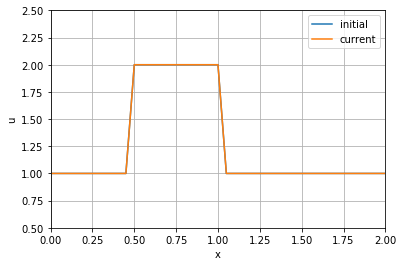

In [12]:
plot_solution(0, u_hist, x)

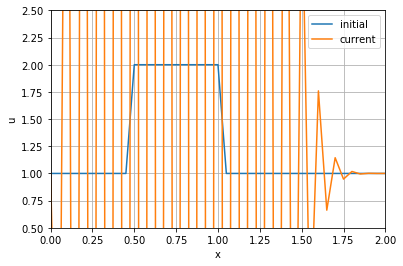

In [13]:
plot_solution(-1, u_hist, x)

In [14]:
import ipywidgets

In [15]:
nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, description='Time Step')
w = ipywidgets.interactive(plot_solution, n=nt_slider, u_hist=ipywidgets.fixed(u_hist), x=ipywidgets.fixed(x))

In [16]:
display(w)

interactive(children=(IntSlider(value=0, description='Time Step', max=20), Output()), _dom_classes=('widget-in…